In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns

In [2]:
ppl_base_paths = ["../eval_results/perplexity/7B/base.json",
                  "../eval_results/perplexity/8B/base.json",
                  "../eval_results/perplexity/3B/base.json",]

ppl_norm_paths = ["../eval_results/perplexity/7B/norm.json",
                  "../eval_results/perplexity/8B/norm.json",
                  "../eval_results/perplexity/3B/norm.json",]

model_names = ["LLaMA 2 7B Chat",
               "LLaMA 3.1 8B Instruct",
               "LLaMA 3.2 3B Instruct",]

In [3]:
ppl_base_data = []
for name in ppl_base_paths:
    with open(name) as f:
        ppl_base_data.append(json.load(f))

ppl_norm_data = []
for name in ppl_norm_paths:
    with open(name) as f:
        ppl_norm_data.append(json.load(f))

In [4]:
l2_token_density = {'en': 31738, 'fr': 45407, 'ru': 51274, 'uk': 53536, 'es': 45268, 'vi': 88465, 'id': 54432, 'hi': 137103, 'zh': 60545}
l3_token_density = {'en': 25800, 'fr': 40693, 'ru': 42318, 'uk': 42800, 'es': 39818, 'vi': 35662, 'id': 39859, 'hi': 66040, 'zh': 33560}
flores_token_density = {'en': 153458, 'fr': 186053, 'ru': 171480, 'uk': 71545, 'es': 184439, 'vi': 163919, 'id': 166102, 'hi': 163418, 'zh': 164661}

l2_pretrain_lang_proportion = {'en': 0.897, 'fr': 0.0016, 'ru': 0.0013, 'uk': 0.0007, 'es': 0.0013, 'vi': 0.0008, 'id': 0.0003, 'hi': 0.0, 'zh': 0.0013}

l2_sizes = {a:b/l2_token_density["en"] for a,b in l2_token_density.items()}
l3_sizes = {a:b/l3_token_density["en"] for a,b in l3_token_density.items()}
flores_sizes = {a:b/flores_token_density["en"] for a,b in flores_token_density.items()}

sizes = [l2_sizes, l3_sizes, l3_sizes]

alt_lang_order = ["es", "fr", "hi", "id", "ru", "uk", "vi", "zh"]
alt_lang_order2 = ["es", "fr", "hi", "id", "ru", "uk", "vi", "zh", "en"]

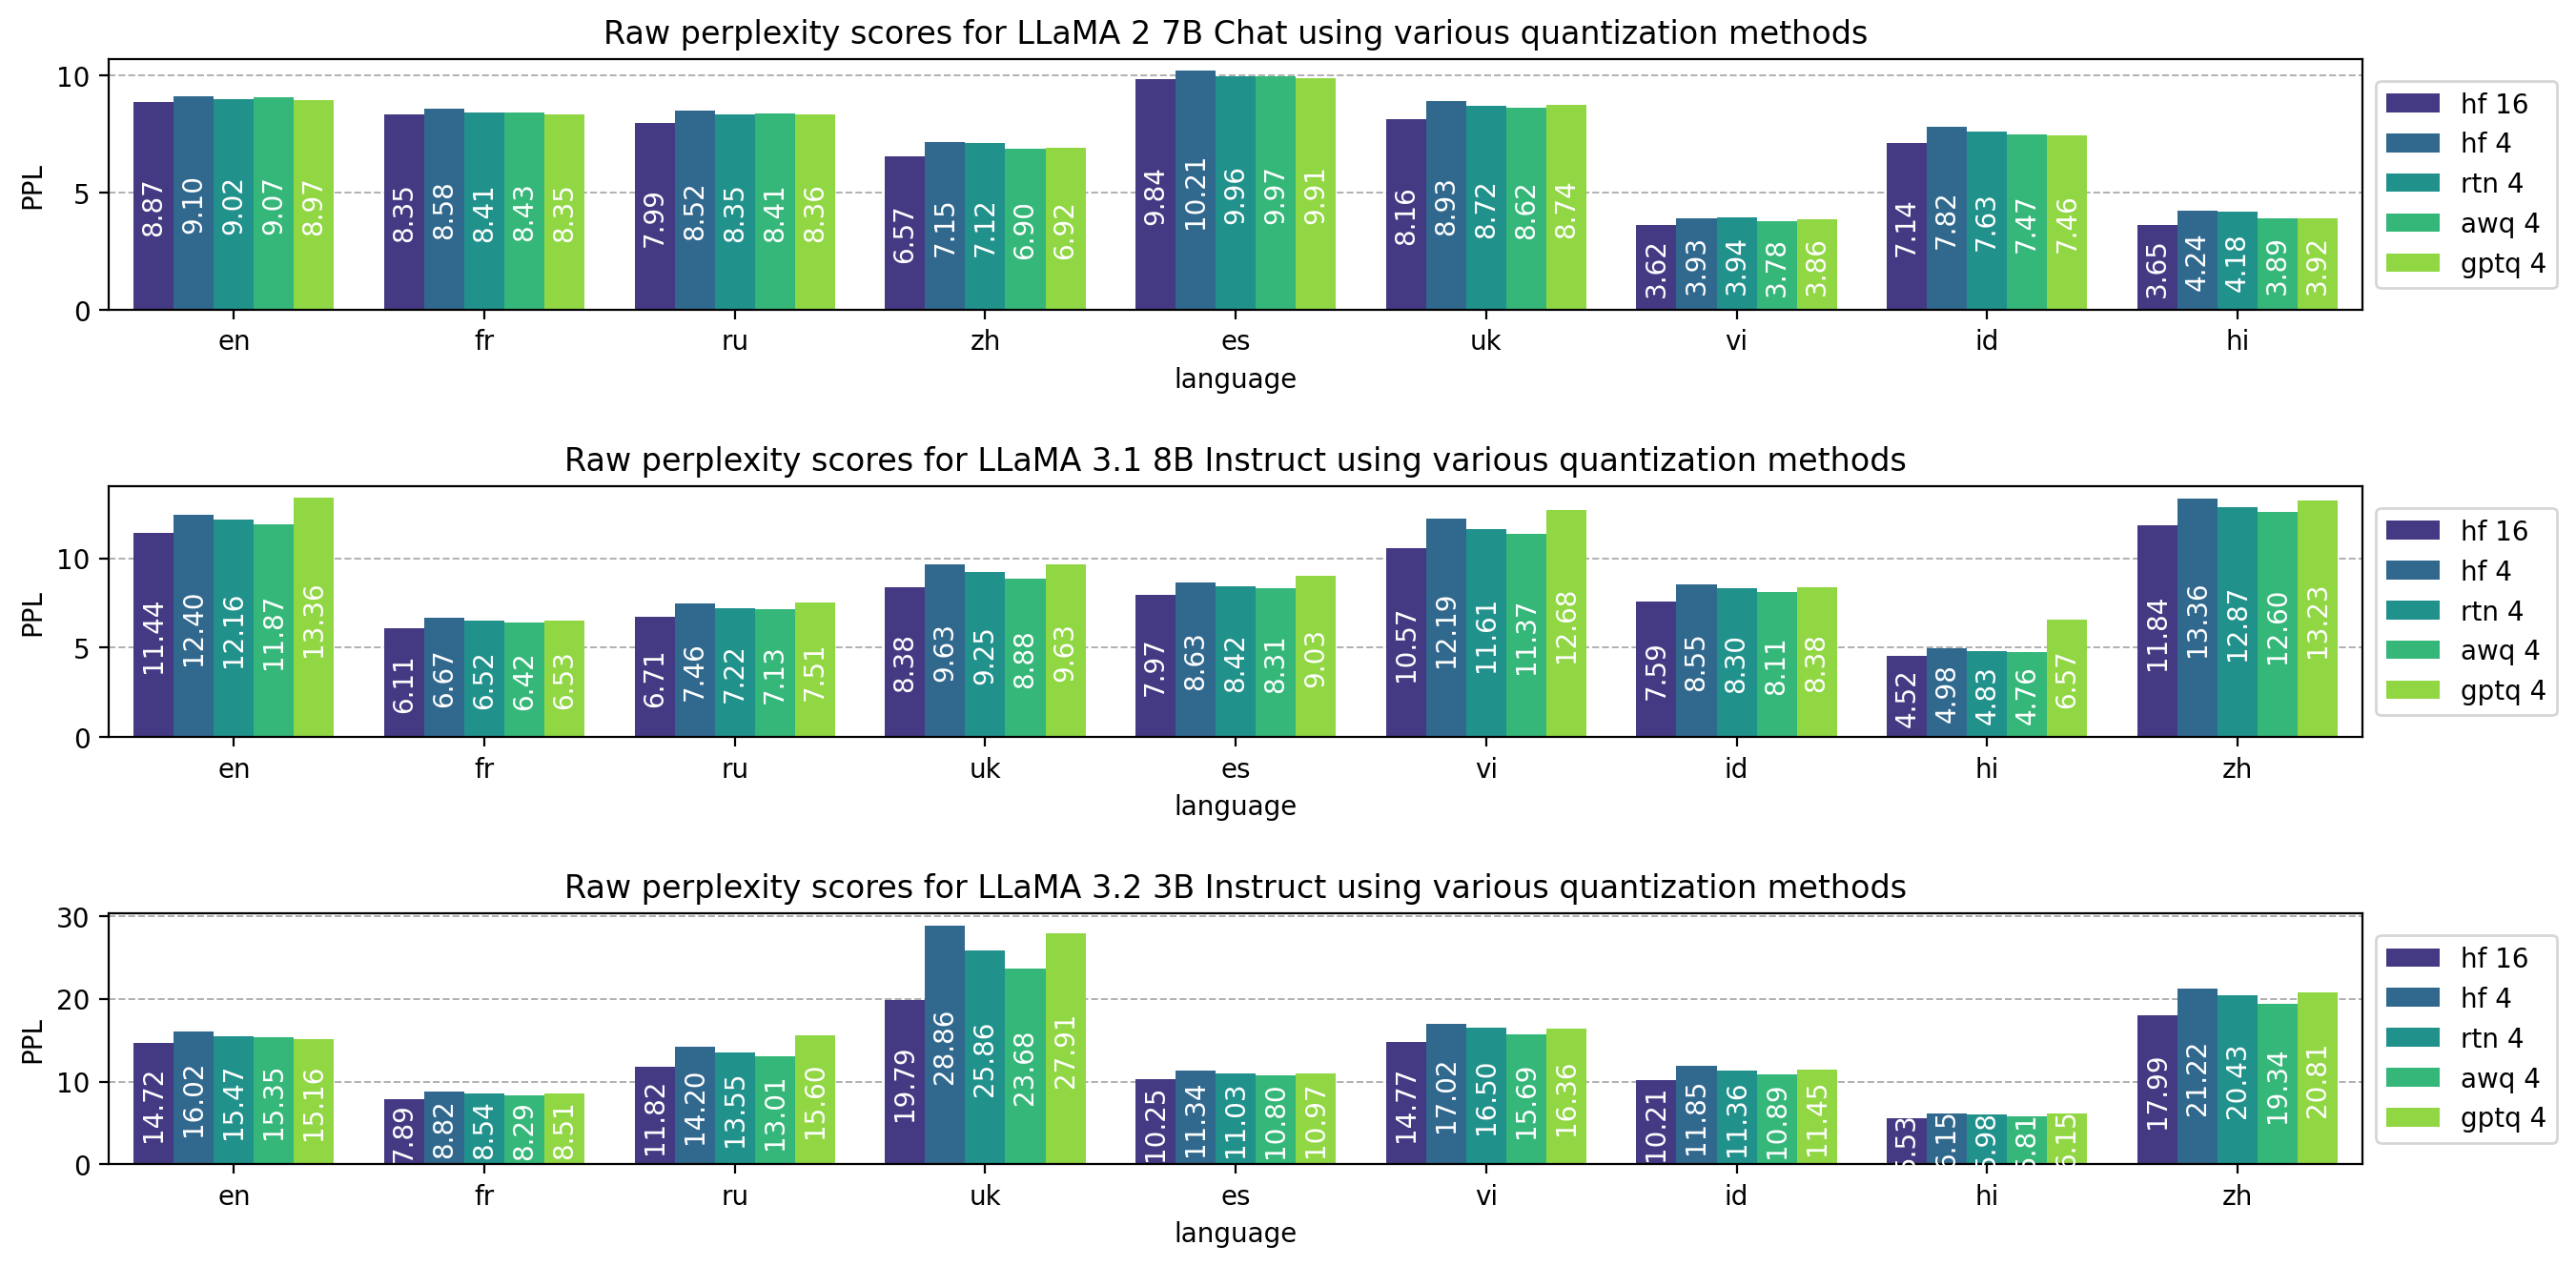

In [5]:
fig, axs = plt.subplots(nrows=3, figsize=(14, 7), dpi=200)


for n, ppl in enumerate(ppl_base_data):
    df = []
    for lang in ppl:
        for quant in ppl[lang]:
            df.append([lang, quant, ppl[lang][quant]["perplexity"]])
    df = pd.DataFrame(df, columns=["language", "quant", "PPL"])


    ax = sns.barplot(x="language", y="PPL", hue="quant", palette="viridis", data=df, saturation=1, ax=axs[n])
    for container in ax.containers:
        labels = ax.bar_label(container, label_type="center", color="white", padding=0, fmt='%.2f')
        for label in labels:
            label.set_rotation(90)
    # plt.yscale("log")
    # ax.set_ylim(0, 12)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(axis="y", which="both", zorder=-10000, linewidth=0.7, linestyle="--")
    ax.set_axisbelow(True)

    ax.set_title(f"Raw perplexity scores for {model_names[n]} using various quantization methods")

plt.tight_layout(pad=2.0)
plt.show()

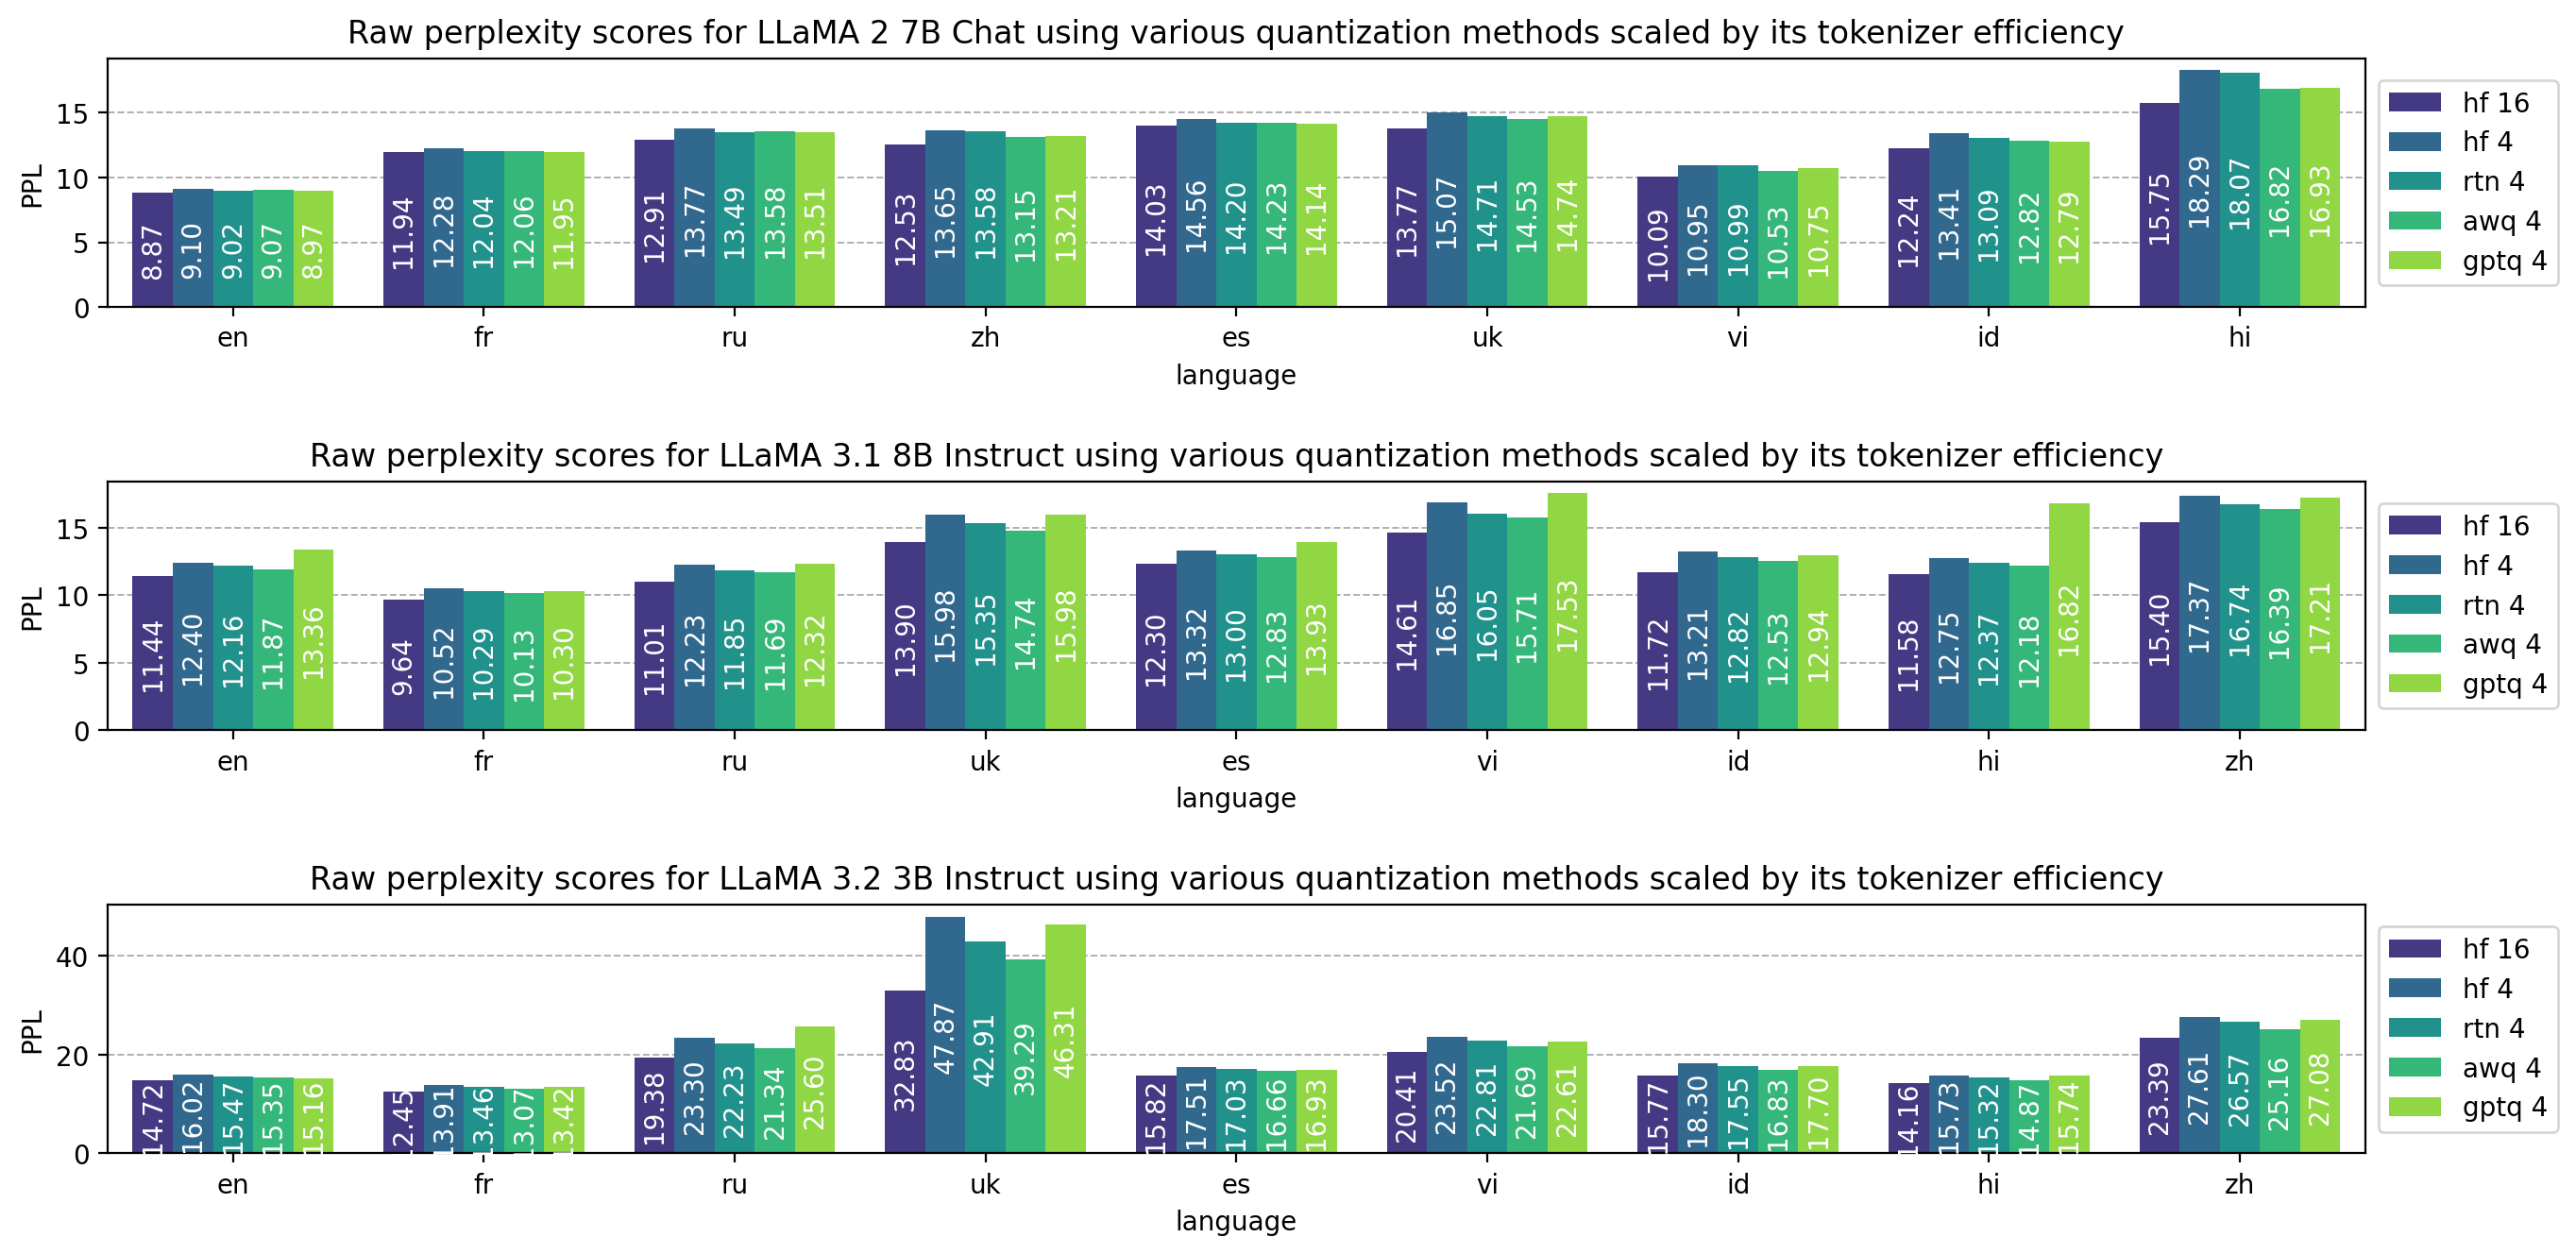

In [6]:
fig, axs = plt.subplots(nrows=3, figsize=(14, 7), dpi=200)

for n, ppl in enumerate(ppl_base_data):
    df = []
    for lang in ppl:
        for quant in ppl[lang]:
            df.append([lang, quant, ppl[lang][quant]["perplexity"] * sizes[n][lang]])
    df = pd.DataFrame(df, columns=["language", "quant", "PPL"])


    ax = sns.barplot(x="language", y="PPL", hue="quant", palette="viridis", data=df, saturation=1, ax=axs[n])
    for container in ax.containers:
        labels = ax.bar_label(container, label_type="center", color="white", padding=0, fmt='%.2f')
        for label in labels:
            label.set_rotation(90)
    # plt.yscale("log")
    # ax.set_ylim(0, 12)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(axis="y", which="both", zorder=-10000, linewidth=0.7, linestyle="--")
    ax.set_axisbelow(True)

    ax.set_title(f"Raw perplexity scores for {model_names[n]} using various quantization methods scaled by its tokenizer efficiency")

plt.tight_layout(pad=2.0)
plt.show()

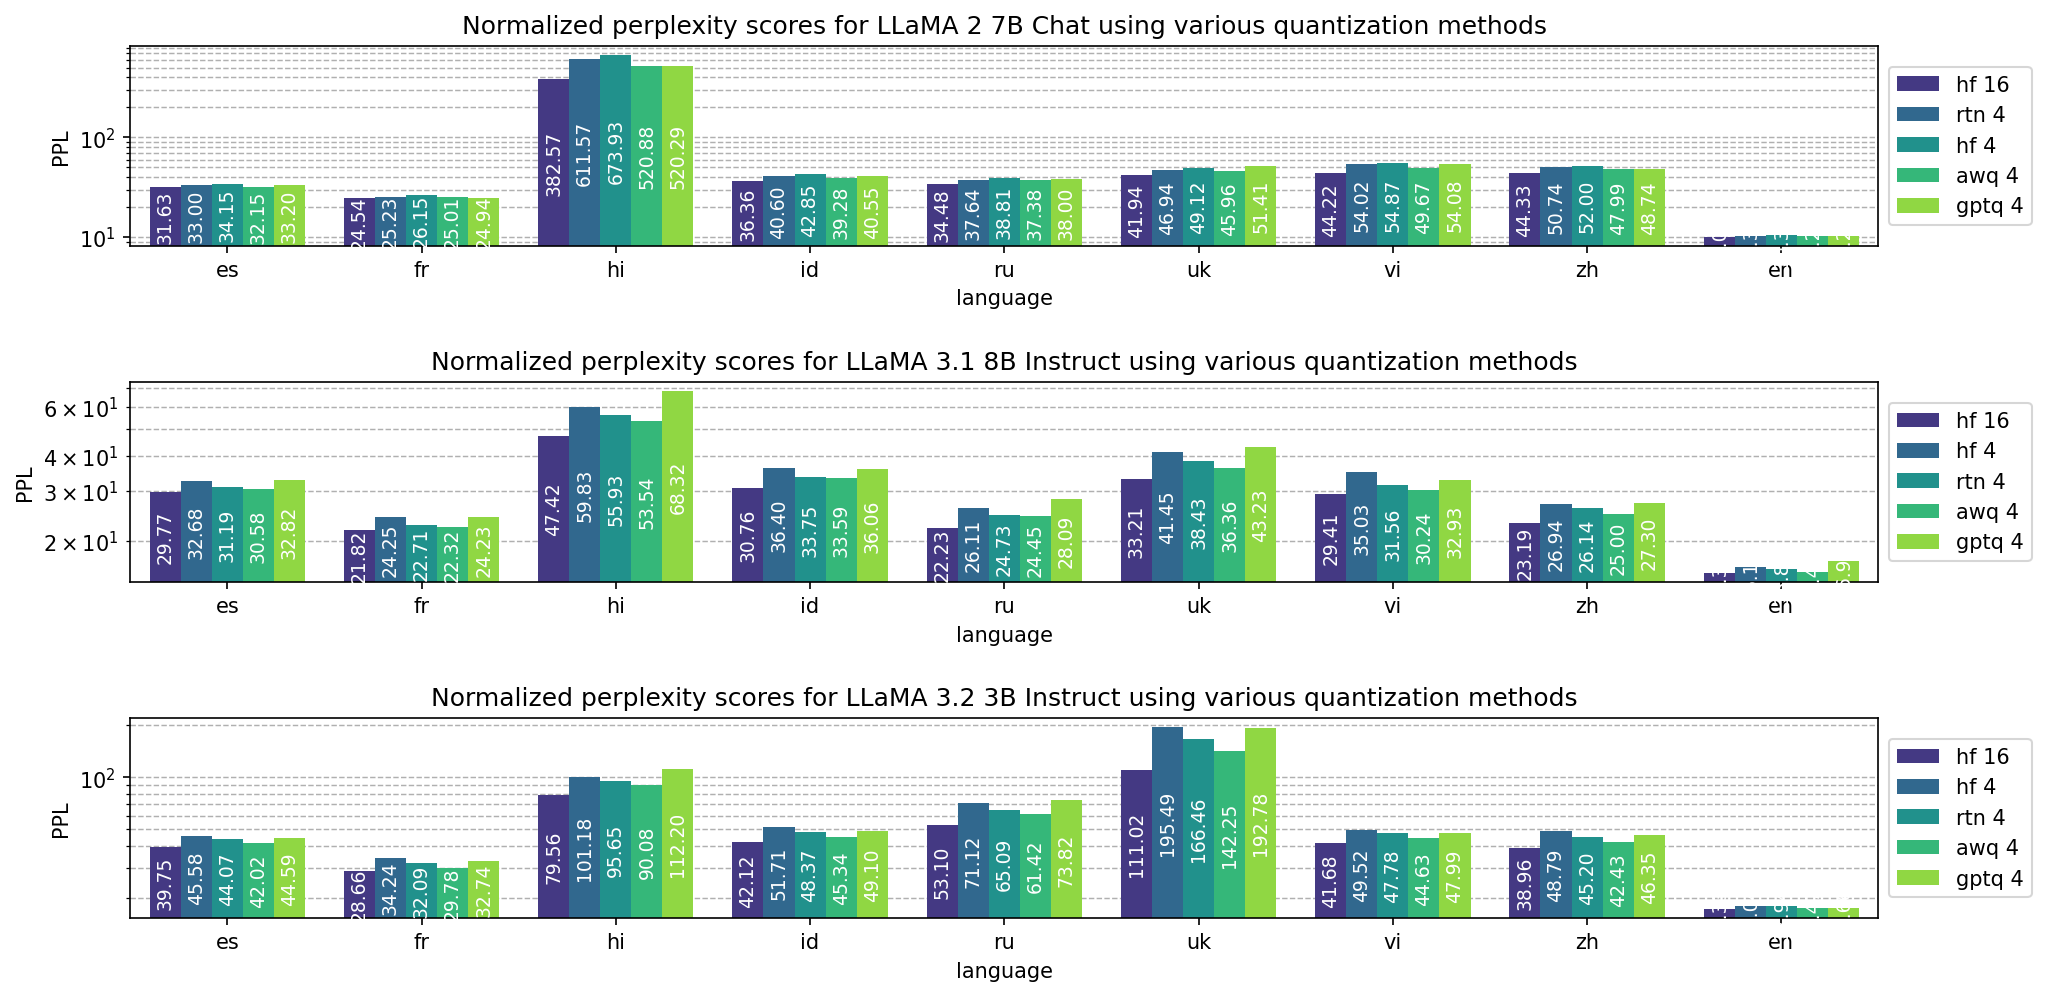

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(14, 7), dpi=150)

for n, ppl in enumerate(ppl_norm_data):
    df = []
    for lang in alt_lang_order2:
        for quant in ppl[lang]:
            df.append([lang, quant, ppl[lang][quant]["perplexity"]])
    df = pd.DataFrame(df, columns=["language", "quant", "PPL"])

    ax = sns.barplot(x="language", y="PPL", hue="quant", palette="viridis", data=df, saturation=1, ax=axs[n])
    for container in ax.containers:
        labels = ax.bar_label(container, label_type="center", color="white", padding=0, fmt='%.2f')
        for label in labels:
            label.set_rotation(90)
            label.set_fontsize(9)
    ax.set_yscale("log")
    # ax.set_ylim(0, 100)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(axis="y", which="both", zorder=-10000, linewidth=0.7, linestyle="--")
    ax.set_axisbelow(True)

    ax.set_title(f"Normalized perplexity scores for {model_names[n]} using various quantization methods")

plt.tight_layout(pad=2.0)
plt.show()

# print(acc.to_latex(float_format='%.2f'))


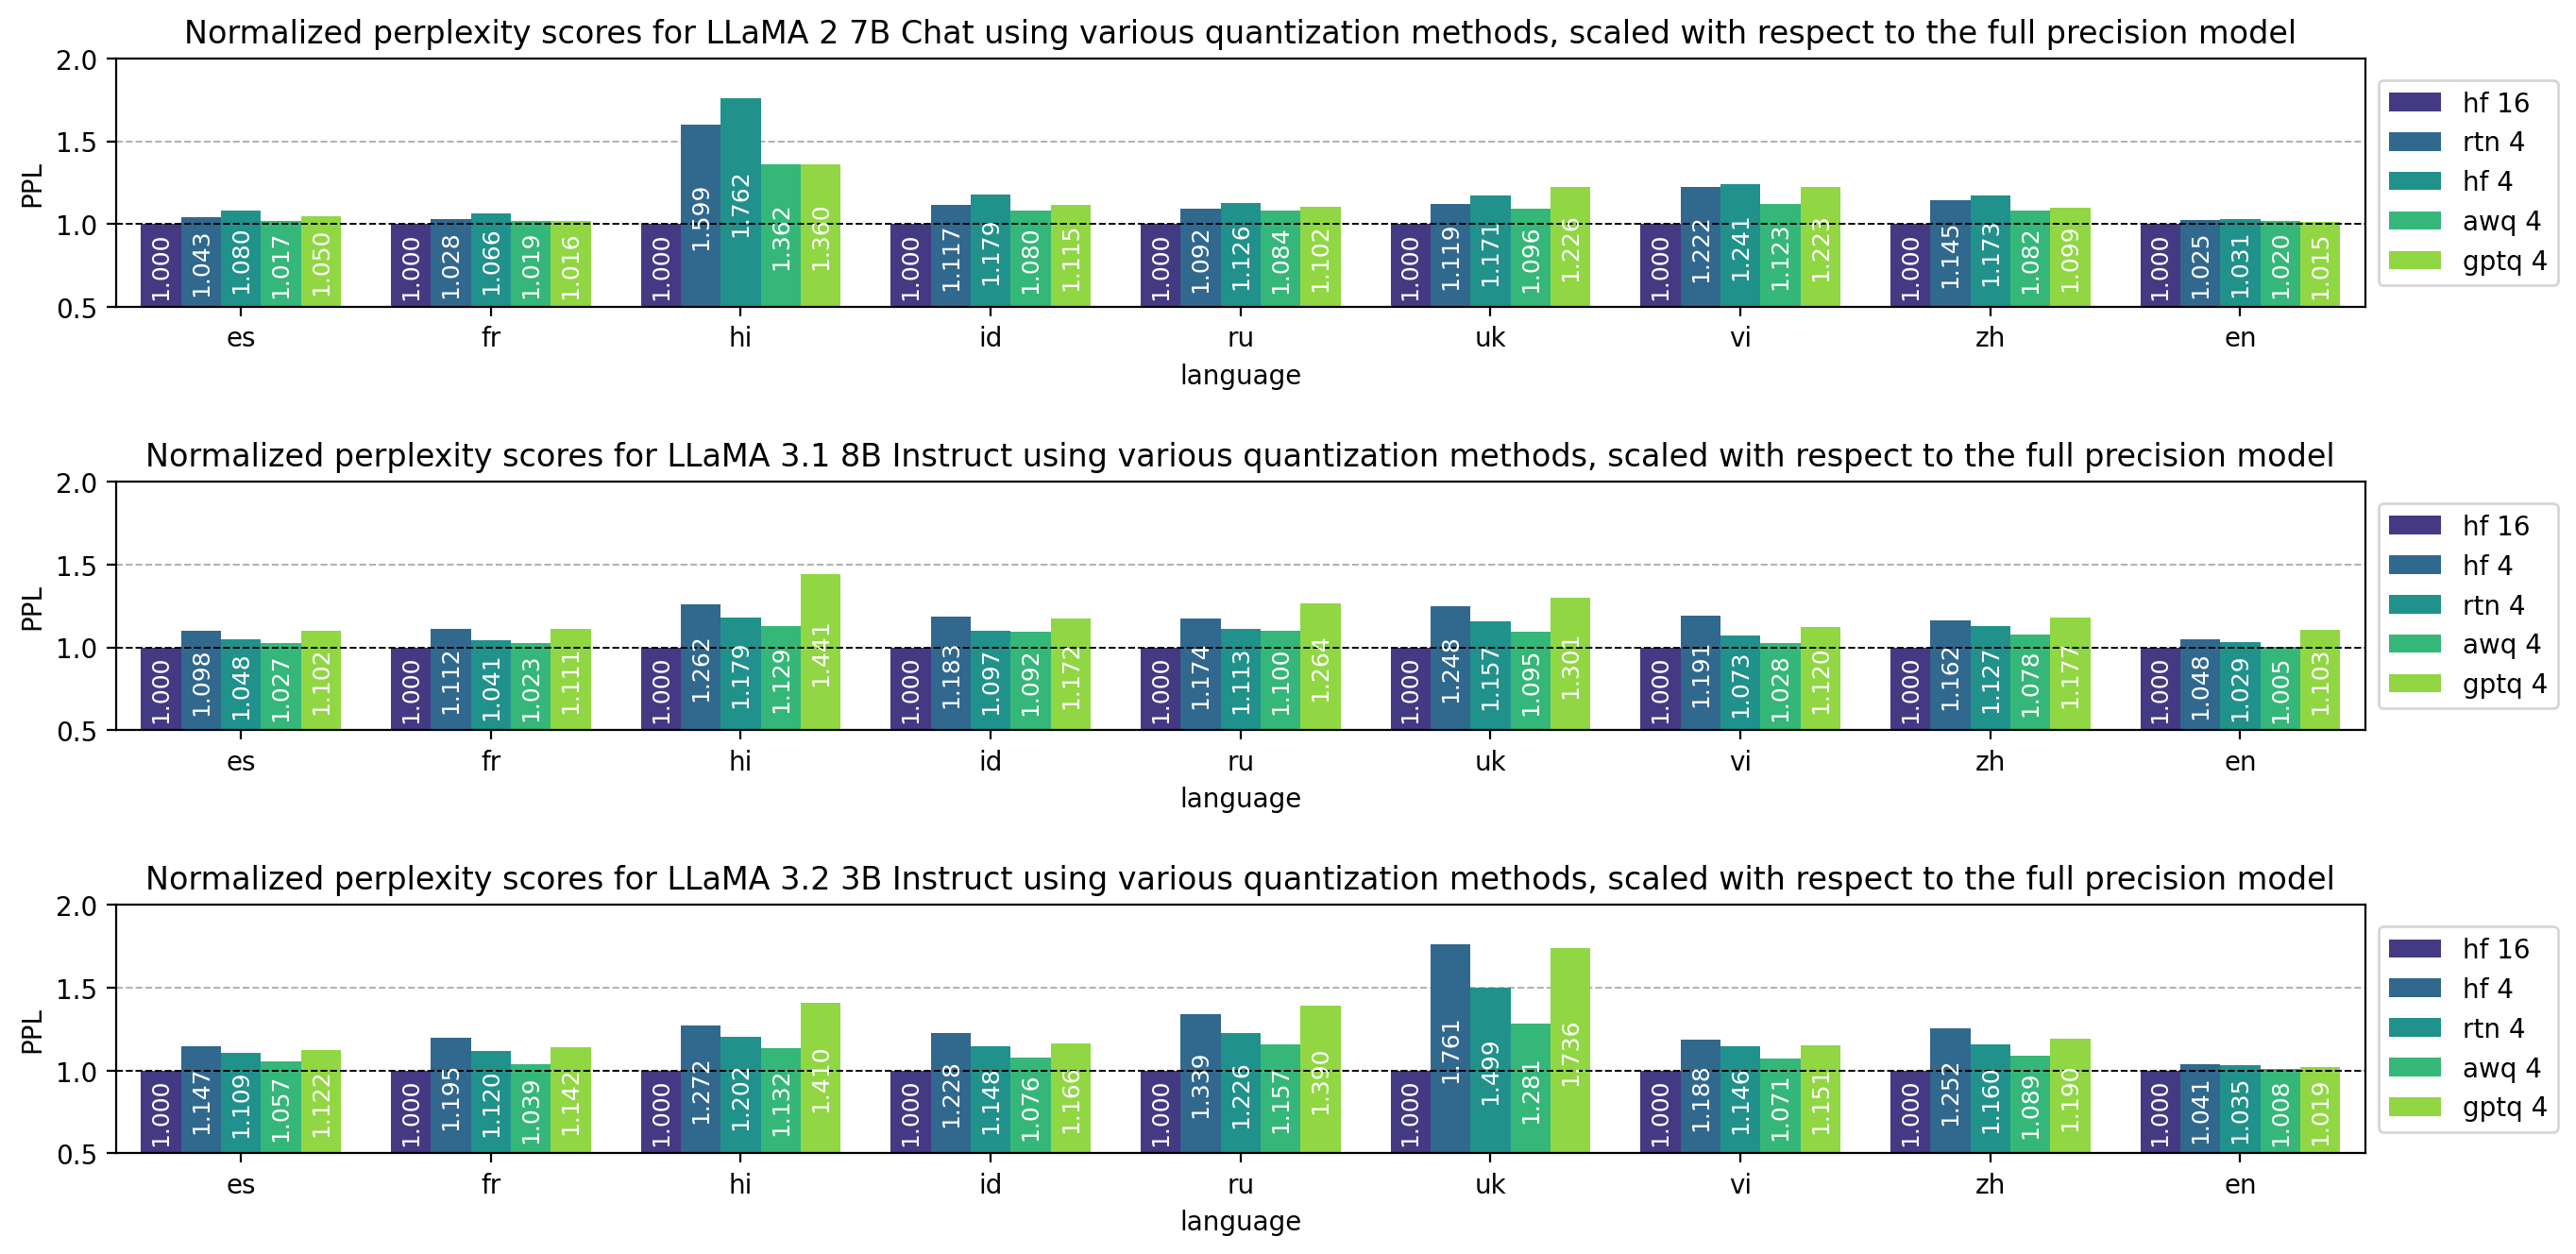

In [8]:
fig, axs = plt.subplots(nrows=3, figsize=(14, 7), dpi=200)

acc = None
for n, ppl in enumerate(ppl_norm_data):
    df = []
    for lang in alt_lang_order2:
        for quant in ppl[lang]:
            df.append([lang, quant, ppl[lang][quant]["perplexity"]/ppl[lang]["hf 16"]["perplexity"]])
    df = pd.DataFrame(df, columns=["language", "quant", "PPL"])

    rot = df.pivot_table(index="quant", columns="language", values="PPL").sub(1).mul(100)
    rot = rot.drop("hf 16")
    if acc is None:
        acc = rot
    else:
        acc = pd.concat([acc, rot])

    ax = sns.barplot(x="language", y="PPL", hue="quant", palette="viridis", data=df, saturation=2, ax=axs[n])
    for container in ax.containers:
        labels = ax.bar_label(container, label_type="center", color="white", padding=0, fmt='%.3f')
        for label in labels:
            label.set_rotation(90)
            label.set_fontsize(9)
    # plt.yscale("log")
    # ax.set_ylim(0, 12)

    ax.axhline(1, color='black', linestyle='--', linewidth=0.7)
    ax.set_ylim(0.5, 2)


    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(axis="y", which="both", zorder=-10000, linewidth=0.7, linestyle="--")
    ax.set_axisbelow(True)

    ax.set_title(f"Normalized perplexity scores for {model_names[n]} using various quantization methods, scaled with respect to the full precision model")


plt.tight_layout(pad=2.0)
plt.savefig("./norm_ppl_all.pdf", format="pdf", transparent=True, dpi=600, bbox_inches='tight')
plt.show()

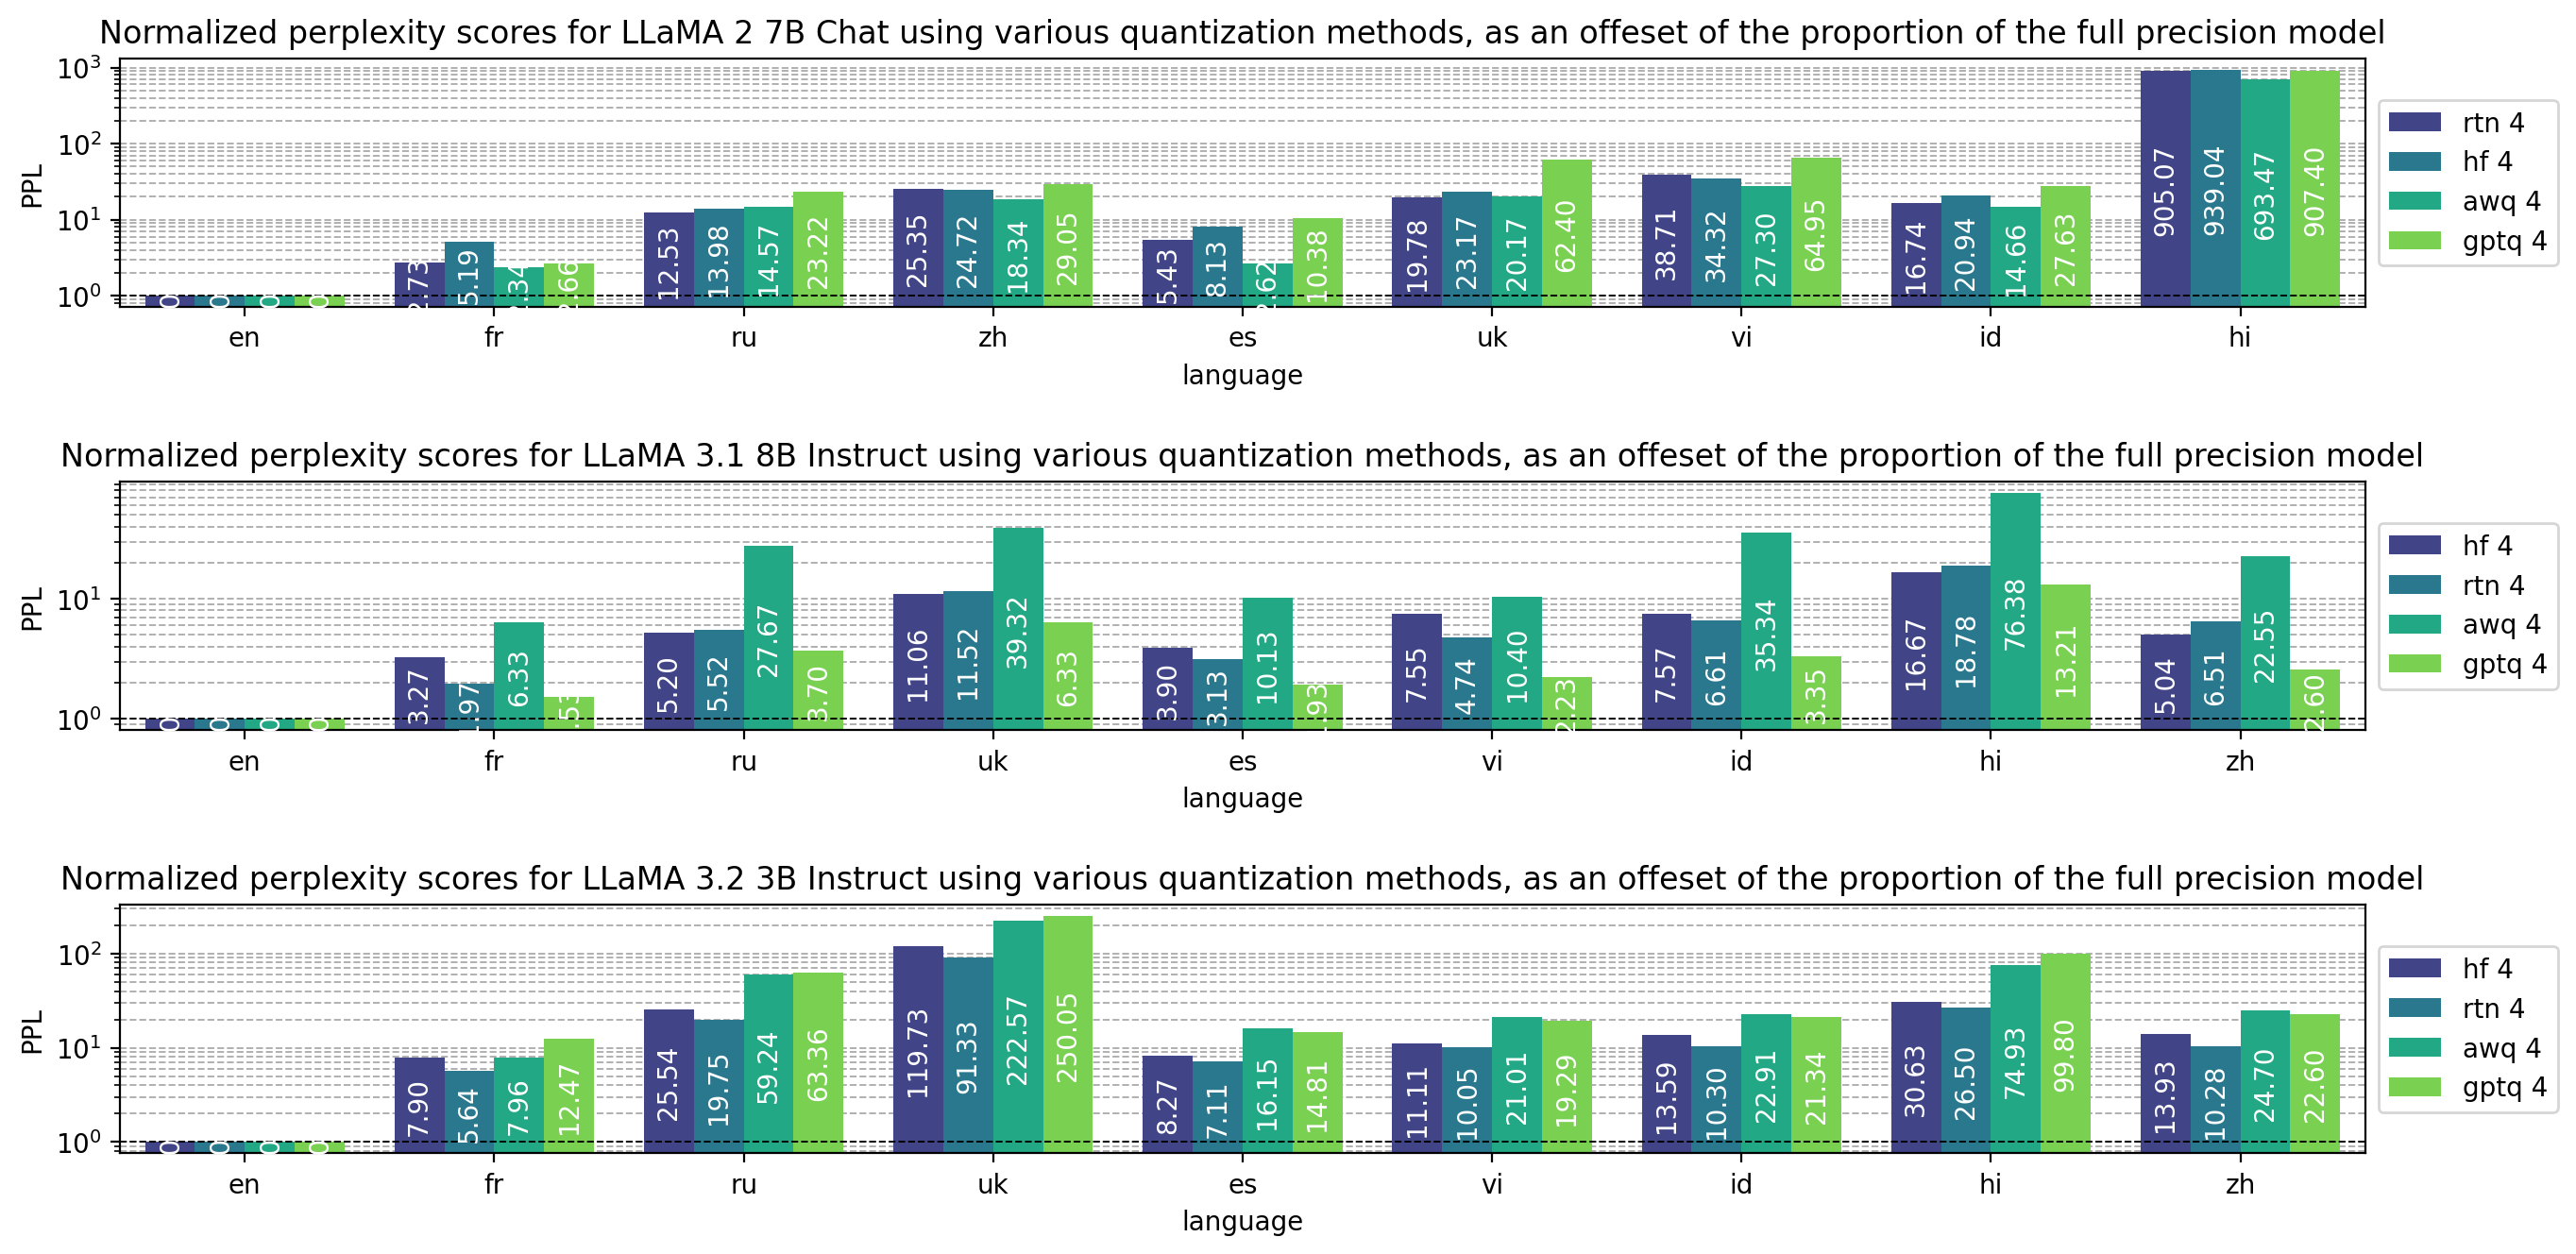

In [9]:
fig, axs = plt.subplots(nrows=3, figsize=(14, 7), dpi=200)

for n, ppl in enumerate(ppl_norm_data):
    df = []
    for lang in ppl:
        for quant in ppl[lang]:
            if quant == "hf 16": continue
            df.append([lang, quant, (ppl[lang][quant]["perplexity"]-ppl[lang]["hf 16"]["perplexity"])/(ppl["en"][quant]["perplexity"]-ppl["en"]["hf 16"]["perplexity"])])
    df = pd.DataFrame(df, columns=["language", "quant", "PPL"])

    ax = sns.barplot(x="language", y="PPL", hue="quant", palette="viridis", data=df, saturation=1, ax=axs[n])
    for container in ax.containers:
        labels = ax.bar_label(container, label_type="center", color="white", padding=0, fmt='%.2f')
        for label in labels:
            label.set_rotation(90)
    # plt.yscale("log")
    # ax.set_ylim(0, 12)

    ax.axhline(1, color='black', linestyle='--', linewidth=0.7)
    ax.set_yscale("log")

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(axis="y", which="both", zorder=-10000, linewidth=0.7, linestyle="--")
    ax.set_axisbelow(True)

    ax.set_title(f"Normalized perplexity scores for {model_names[n]} using various quantization methods, as an offeset of the proportion of the full precision model")

plt.tight_layout(pad=2.0)
plt.show()

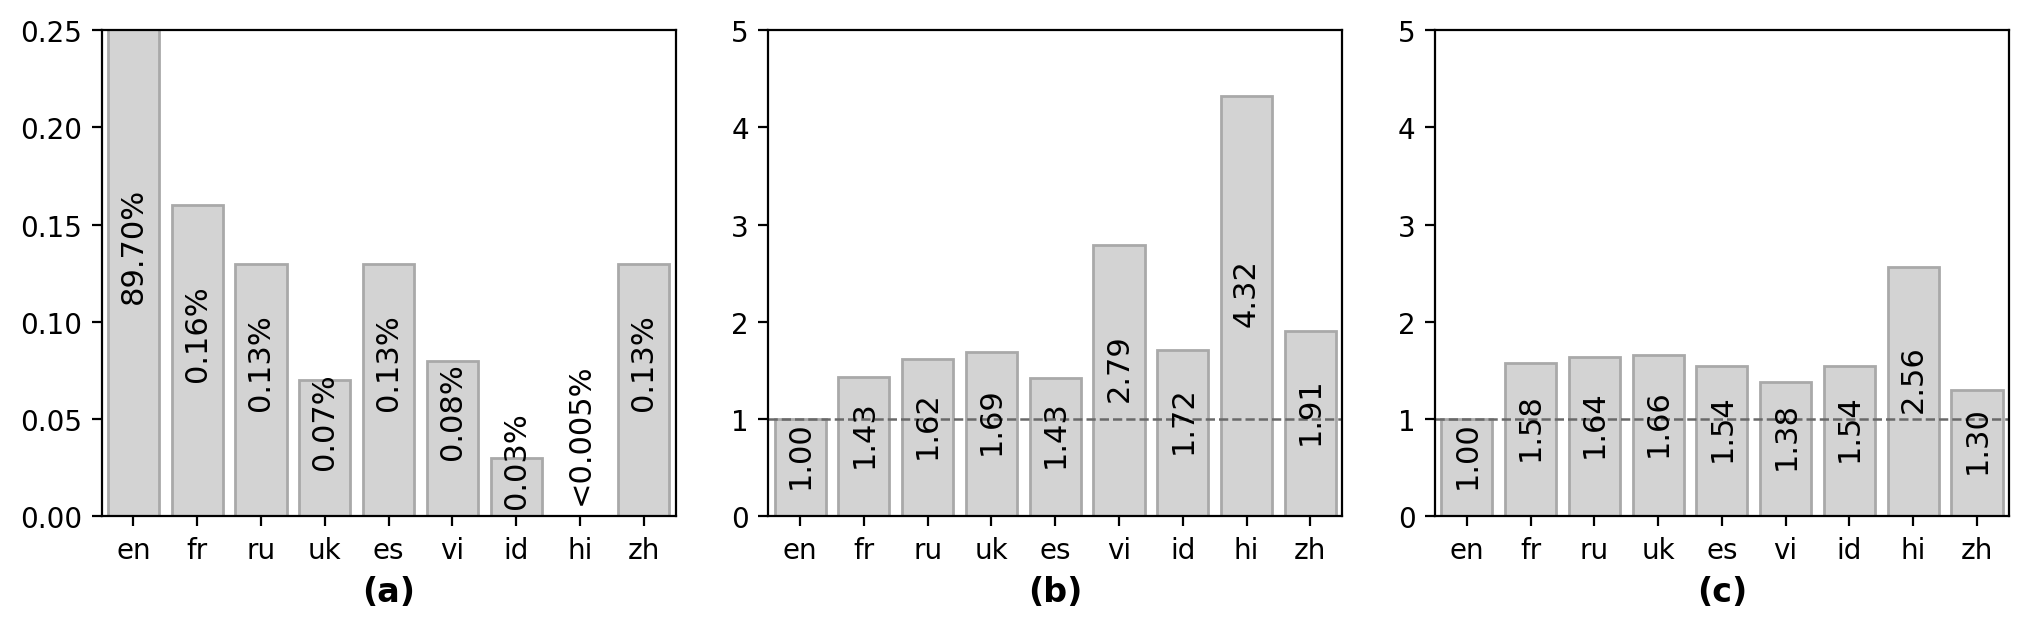

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(10.5, 3.5), dpi=200)

ax = sns.barplot(y=[a*100 for a in l2_pretrain_lang_proportion.values()], x=l2_pretrain_lang_proportion.keys(), color="lightgray", edgecolor="darkgray", saturation=1, ax=axs[0])
ax.set_ylim(0, 0.25)
for container in ax.containers:
    labels = ax.bar_label(container, label_type="center", color="black", padding=10, fmt='%.2f%%')
    for label in labels:
        if label._text == "0.00%":
            label._text = "<0.005%"
            label.set_y(30)
        label.set_fontsize(11)
        label.set_rotation(90)
# ax.set_title("Language distribution within\nthe pretraining data of LLaMA 2", wrap=True)
ax.set_xlabel("(a)", weight="bold", fontsize=12)

ax = sns.barplot(y=l2_sizes.values(), x=l2_sizes.keys(), color="lightgray", edgecolor="darkgray", saturation=1, ax=axs[1])
for container in ax.containers:
    labels = ax.bar_label(container, label_type="center", color="black", padding=5, fmt='%.2f')
    for label in labels:
        label.set_fontsize(11)
        label.set_rotation(90)
ax.axhline(1, color='dimgray', linestyle='--', linewidth=0.9)
ax.set_ylim(0, 5)
# ax.set_title("Estimated LLaMA 2 tokenizer efficiency\nper language based on FLORES,\nnormalized by the density for English", wrap=True)
ax.set_xlabel("(b)", weight="bold", fontsize=12)

# ax = sns.barplot(y=flores_sizes.values(), x=flores_sizes.keys(), color="lightgray", edgecolor="darkgray", saturation=1, ax=axs[2])
# for container in ax.containers:
#     labels = ax.bar_label(container, label_type="center", color="black", padding=5, fmt='%.2f')
#     for label in labels:
#         label.set_rotation(90)
# ax.axhline(1, color="darkgrey")
# ax.set_title("Estimated Sacrebleu FLORES 101 tokenizer\nefficiency per language based on FLORES,\nnormalized by the density for English", wrap=True)

ax = sns.barplot(y=l3_sizes.values(), x=l3_sizes.keys(), color="lightgray", edgecolor="darkgray", saturation=1, ax=axs[2])
for container in ax.containers:
    labels = ax.bar_label(container, label_type="center", color="black", padding=5, fmt='%.2f')
    for label in labels:
        label.set_fontsize(11)
        label.set_rotation(90)
ax.axhline(1, color='dimgray', linestyle='--', linewidth=0.9)

ax.set_ylim(0, 5)
# ax.set_title("Estimated LLaMA 3 tokenizer efficiency\nper language based on FLORES,\nnormalized by the density for English", wrap=True)
ax.set_xlabel("(c)", weight="bold", fontsize=12)

plt.tight_layout(pad=2.0)
plt.savefig("./tok_densities.pdf", format="pdf", transparent=True, dpi=300, bbox_inches='tight')
plt.show()